### Ridge and Lasso Regression

Ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity
In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.



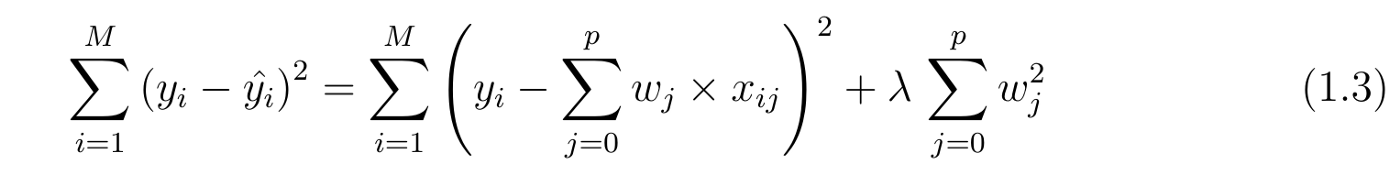

In [1]:
from IPython.display import Image
Image(filename="1_hAGhQehrqAmT1pvz3q4t8Q.png", width=400, height=400)

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [3]:
boston=load_boston()

In [4]:
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df.shape

(506, 13)

In [5]:
#df['Price']=boston.target #Add a column named "Price" from target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
target_df=pd.DataFrame(boston.target)
target_df = boston.target

In [28]:
target_df.shape

(506,)

In [7]:
X_train, X_test, y_train, y_test=train_test_split(df, target_df, test_size=0.3, random_state=3)
y_train.shape
y_test.shape

(152,)

In [8]:
X_train.shape

(354, 13)

In [27]:
X_test.shape

(152, 13)

In [9]:
LR=LinearRegression()

In [10]:
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
LR.coef_

array([-1.28899229e-01,  4.62536564e-02, -5.41974027e-02,  3.83208843e+00,
       -1.24514995e+01,  3.72790367e+00,  7.37824474e-03, -1.19551784e+00,
        2.80152377e-01, -7.75364999e-03, -8.27122705e-01,  1.25331573e-02,
       -5.56644117e-01])

In [12]:
feature_cols=boston.feature_names

In [13]:
z=zip(feature_cols, LR.coef_)
z=set(z)
z

{('AGE', 0.00737824474232546),
 ('B', 0.012533157303228487),
 ('CHAS', 3.8320884283917387),
 ('CRIM', -0.12889922856564154),
 ('DIS', -1.1955178354378062),
 ('INDUS', -0.05419740269623776),
 ('LSTAT', -0.5566441165591451),
 ('NOX', -12.451499513195158),
 ('PTRATIO', -0.827122705173768),
 ('RAD', 0.2801523771179751),
 ('RM', 3.727903672910514),
 ('TAX', -0.007753649991246121),
 ('ZN', 0.04625365637345734)}

In [14]:
x=LR.predict(X_test)
x[0]

38.01528515393382

Ridge Regression
Higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
Restricted and in this case linear and ridge regression resembles

In [15]:
ridge001 = Ridge(alpha=0.01) 
ridge001.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [16]:
ridge001.coef_

array([-1.28869508e-01,  4.62616037e-02, -5.46734649e-02,  3.82991200e+00,
       -1.23346502e+01,  3.72939688e+00,  7.27044718e-03, -1.19369533e+00,
        2.79812365e-01, -7.75637125e-03, -8.25725742e-01,  1.25406308e-02,
       -5.56819788e-01])

In [17]:
z=zip(feature_cols, ridge001.coef_)
z=set(z)
z

{('AGE', 0.0072704471770111655),
 ('B', 0.012540630806392075),
 ('CHAS', 3.8299119985040213),
 ('CRIM', -0.12886950754585066),
 ('DIS', -1.1936953289283696),
 ('INDUS', -0.05467346490087036),
 ('LSTAT', -0.5568197875740579),
 ('NOX', -12.334650208883371),
 ('PTRATIO', -0.8257257421223283),
 ('RAD', 0.27981236463959896),
 ('RM', 3.729396879724005),
 ('TAX', -0.00775637124844505),
 ('ZN', 0.04626160369876957)}

Ridge with highre Alpha of 100

In [18]:
ridge100 = Ridge(alpha=100) 
ridge100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [19]:
ridge100.coef_

array([-0.11973214,  0.0571583 , -0.10448294,  0.74655991, -0.13349626,
        1.93180691,  0.01453469, -0.95470769,  0.29564552, -0.01059791,
       -0.76014483,  0.01180499, -0.71980859])

In [20]:
zipp=zip(feature_cols, ridge100.coef_)
zipp = set(zipp) 
zipp

{('AGE', 0.014534694422714583),
 ('B', 0.011804994840420519),
 ('CHAS', 0.7465599103576117),
 ('CRIM', -0.11973214011429757),
 ('DIS', -0.9547076864102013),
 ('INDUS', -0.10448293930864148),
 ('LSTAT', -0.7198085902361211),
 ('NOX', -0.13349625846593563),
 ('PTRATIO', -0.7601448291691089),
 ('RAD', 0.29564552031894387),
 ('RM', 1.9318069081805924),
 ('TAX', -0.010597909338109343),
 ('ZN', 0.05715829787231605)}

# Scores

1. LinearRegression

In [21]:
LRtrain_score=LR.score(X_train, y_train)
LRtrain_score

0.7419034960343789

In [22]:
LRtest_score=LR.score(X_test, y_test)
LRtest_score

0.7147895265576856

    2. Ridge Regression lambda=0.01

In [23]:
RRtrain_score=ridge001.score(X_train, y_train)
RRtrain_score

0.7419030253527293

In [24]:
RRtest_score=ridge001.score(X_test, y_test)
RRtest_score

0.714612537312391

lambda=100

In [25]:
RRtrain_score=ridge100.score(X_train, y_train)
RRtrain_score

0.7172809669938278

In [26]:
RRtest_score=ridge100.score(X_test, y_test)
RRtest_score

0.6805765856921946